In [19]:
mlist =['AAPL','MSFT','NVDA','TSLA','ADBE','NFLX','QCOM','SHOP','ERF',
        'ABNB','ABT','AMAT','AMD','AMZN','ASML','AVGO','BA','BAC','BKNG',
        'CMG','COST','CRM','CUK','DOCU','DPZ','ETSY','F','FTNT','GOOGL',
        'ILMN','ISRG','KLAC','MCD','LRCX','MEDP','META','MRVL','MU','NKE',
        'ORCL','PANW','PFE','PLTR','PLUG','PYPL','QQQ','SPY','ROKU','RSG',
        'SBUX','SNOW','SQ','SWKS','TGT','TMO','TSM','TWLO','TXN','UPST',
        'VEEV','WMT', 'BLDR', 'TQQQ']

watchlist = ['MSFT', 'AAPL', 'AMZN', 'NVDA', 'BLDR', 'GOOGL', 'NFLX', 'META', 'SPY', 'QQQ', 'AMD', 'TSLA', 'ISRG']

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys

sys.path.append(r'\Users\jimhu\option_trader\src')
  
from option_trader.admin.site import site
from option_trader.admin.user import user
from option_trader.consts import strategy

mysite = site('mysite')

In [4]:
jihuang = mysite.create_user('jihuang')
jihuang.update_user_email('jim.huang.bellevue@gmail.com')
chrishua = mysite.create_user('chrishua')
stester = mysite.create_user('stester')
andyhua = mysite.create_user('andyhua')
dennishua = mysite.create_user('dennishua')
jay = mysite.create_user('jay')

#chrishua.update_default_watchlist(watchlist)
#dennishua.update_default_watchlist(watchlist)
#jihuang.update_default_watchlist(watchlist)
#stester.update_default_watchlist(mlist)

chrishua.update_user_email('chrishua123@hotmail.com')
stester.update_user_email('jim.huang.bellevue@gmail.com')
andyhua.update_user_email('jim.huang.bellevue@gmail.com')
dennishua.update_user_email('dennhua@live.com')
jihuang.update_user_email('jim.huang.bellevue@gmail.com')

User jihuang already exists return existing user
User chrishua already exists return existing user
User stester already exists return existing user
User andyhua already exists return existing user
User dennishua already exists return existing user
User jay already exists return existing user


In [5]:
iron_condor = stester.create_account('iron_condor')
iron_condor.update_default_strategy(strategy.IRON_CONDOR_LIST)
iron_condor.update_default_watchlist(mlist)
spread = stester.create_account('spread')
spread.update_default_strategy(strategy.SPREAD_LIST)
spread.update_default_watchlist(mlist)
butterfly = stester.create_account('butterfly')
butterfly.update_default_strategy(strategy.BUTTERFLY_LIST)
butterfly.update_default_watchlist(mlist)
single = stester.create_account('single')
single.update_default_strategy(strategy.SINGLE_LIST )
single.update_default_watchlist(mlist)

Account iron_condor already exist return existing one
Account spread already exist return existing one
Account butterfly already exist return existing one
Account single already exist return existing one


In [6]:
import pandas as pd

df_single = single.get_optionSummary()
print(df_single.shape)
df_spread = spread.get_optionSummary()
print(df_spread.shape)
df_iron_condor = iron_condor.get_optionSummary()
print(df_iron_condor.shape)
df_butterfly = butterfly.get_optionSummary()
print(df_butterfly.shape)
df = pd.concat([df_single, df_spread, df_iron_condor, df_butterfly])

(114, 40)
(647, 58)
(128, 58)
(657, 58)


In [7]:
df.shape[0]

1546

In [8]:
#df_iron_condor[['symbol', 'strategy', 'open_price', 'quantity', 'spread', 'max_profit', 'max_loss', 'win_prob', 'exp_date', 'breakeven_l', 'breakeven_h', 'leg 1 otype', 'leg 1 strike', 'leg 1 open_action', 'leg 1 price', 'leg 2 otype',  'leg 2 strike', 'leg 2 open_action', 'leg 2 price',  'leg 3 otype', 'leg 3 strike', 'leg 3 open_action', 'leg 3 price', 'leg 4 otype',  'leg 4 strike', 'leg 4 open_action', 'leg 4 price']]

df[df['symbol'] == 'AAPL'][['symbol', 'strategy', 'open_price', 'quantity', 'spread', 'max_profit', 'max_loss', 'pnl', 'win_prob', 'exp_date', 'breakeven_l', 'breakeven_h', 'leg 1 otype', 'leg 1 strike', 'leg 1 open_action', 'leg 1 price', 'leg 2 otype',  'leg 2 strike', 'leg 2 open_action', 'leg 2 price',  'leg 3 otype', 'leg 3 strike', 'leg 3 open_action', 'leg 3 price', 'leg 4 otype',  'leg 4 strike', 'leg 4 open_action', 'leg 4 price']]

,symbol,strategy,open_price,quantity,spread,max_profit,max_loss,pnl,win_prob,exp_date,...,leg 2 open_action,leg 2 price,leg 3 otype,leg 3 strike,leg 3 open_action,leg 3 price,leg 4 otype,leg 4 strike,leg 4 open_action,leg 4 price
634,AAPL,Credit Call Butterfly,3.705,3.0,10.0,3.705,6.295,0.588562,52.2,2023-09-15,...,buy_to_open,4.5,call,185.0,sell_to_open,0.845,NaN,NaN,NaN,NaN


In [75]:
#df['cd'] = df.apply(lambda x: 1 if x['credit'] == True else 0, axis = 1)    

d4 = d3[d3['strategy'] == 'Iron Butterfly']

d3[['symbol', 'strategy', 'open_price', 'last_price', 'leg 1 open_action', 'leg 1 price', 'leg 2 open_action', 'leg 2 price',  'leg 3 open_action', 'leg 3 price', 'leg 4 open_action', 'leg 4 price']]


,symbol,strategy,open_price,last_price,leg 1 open_action,leg 1 price,leg 2 open_action,leg 2 price,leg 3 open_action,leg 3 price,leg 4 open_action,leg 4 price
0,ABNB,Credit Call Spread,1.37,1.54,sell_to_open,2.540,buy_to_open,1.065,NaN,NaN,NaN,NaN
2,ABNB,Credit Put Spread,1.30,0.69,sell_to_open,2.975,buy_to_open,1.905,NaN,NaN,NaN,NaN
3,ABNB,Credit Put Spread,1.95,1.95,sell_to_open,4.575,buy_to_open,2.485,NaN,NaN,NaN,NaN
4,ABNB,Credit Call Spread,3.55,3.75,sell_to_open,5.350,buy_to_open,1.775,NaN,NaN,NaN,NaN
5,ABNB,Credit Put Spread,3.47,3.31,sell_to_open,5.300,buy_to_open,1.795,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
331,ROKU,Reverse Iron Butterfly,3.97,-3.95,sell_to_open,0.280,buy_to_open,1.475,buy_to_open,3.800,sell_to_open,1.085
338,SQ,Reverse Iron Butterfly,4.36,-4.41,sell_to_open,0.315,buy_to_open,1.705,buy_to_open,4.075,sell_to_open,0.920
343,UPST,Reverse Iron Butterfly,2.59,-2.57,sell_to_open,0.105,buy_to_open,0.765,buy_to_open,2.830,sell_to_open,0.895
347,SQ,Debit Call Butterfly,3.91,-4.21,buy_to_open,7.150,sell_to_open,1.390,buy_to_open,0.055,NaN,NaN


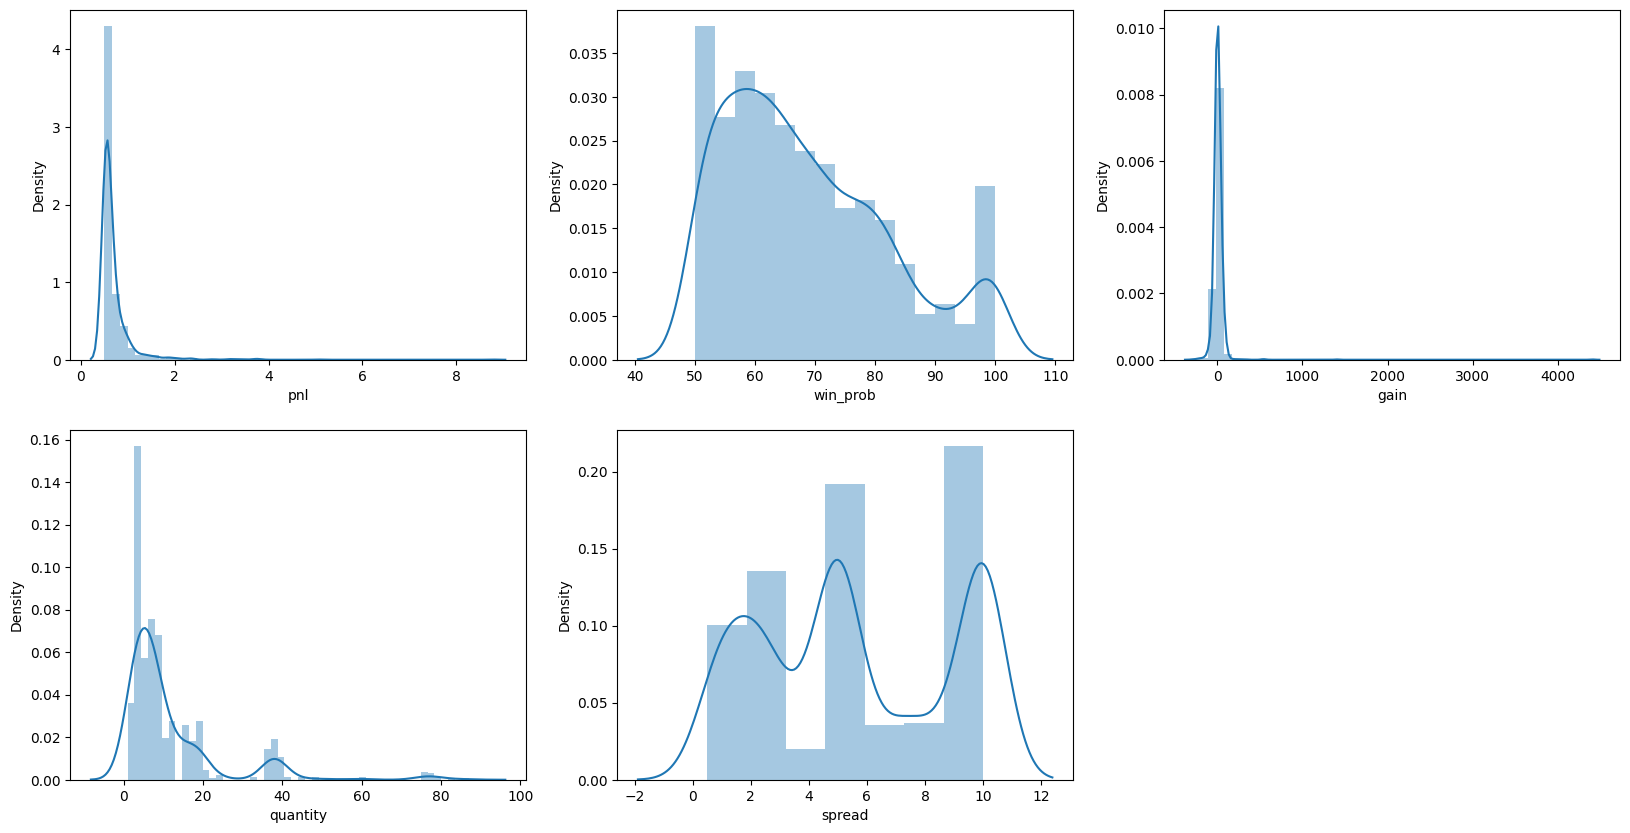

In [11]:
features = ['pnl', 'win_prob', 'gain', 'quantity', 'spread']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

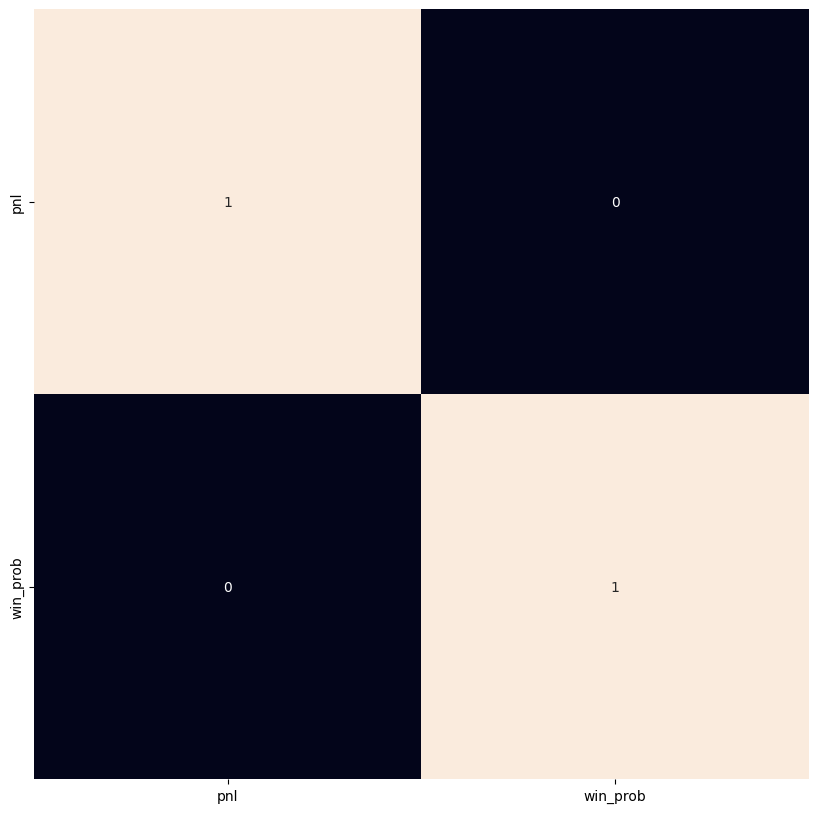

In [30]:
dd = df[['pnl', 'win_prob']]
    
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(dd.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [ ]:
slist = df['symbol'].unique()

for symbol in slist:
    

In [18]:
df[df['symbol']=='SPY'].groupby(['strategy','trade_date', 'exp_date','status', 'gain', 'pnl','win_prob', 'pl', 'status']).size()

strategy               trade_date                        exp_date    status  gain    pnl       win_prob  pl       status
Credit Call Butterfly  2023-08-21 09:45:45.942804-04:00  2023-09-15  closed   92.68  0.694915  95.2       1596.0  closed    1
Credit Call Spread     2023-08-19 22:08:55.126484-04:00  2023-09-08  opened  -24.64  0.526718  67.1      -323.0   opened    1
                       2023-08-19 22:08:56.147589-04:00  2023-09-01  opened  -28.47  0.520913  67.7      -370.5   opened    1
                       2023-08-19 22:08:57.040538-04:00  2023-08-25  opened  -38.24  0.515152  70.7      -481.0   opened    1
                       2023-08-19 22:08:57.653086-04:00  2023-09-15  opened  -13.43  0.503759  63.1      -166.5   opened    1
                       2023-08-19 23:03:27.343739-04:00  2023-09-01  opened  -31.39  0.520913  65.9      -408.5   opened    1
                       2023-08-19 23:03:28.673380-04:00  2023-08-25  opened  -26.47  0.515152  68.6      -333.0   opened   

In [13]:
for symbol in ml:
    print(symbol)
    print(df[(df['symbol']==symbol)].groupby(['strategy','exp_date','gain', 'pl']).size())

NameError: name 'ml' is not defined

In [ ]:
dd = df_single

print(dd.shape)

dd = dd[dd['status']=='opened']

print(dd.shape)

In [ ]:
df.groupby(['strategy'])['gain'].sum()

In [ ]:
ml.sort()

print('symbol','\t win_count', '\t\t\t', 'loss_count', '\t\t', 'win_rate')
    
for symbol in ml:
    win_trade  = df[(df['symbol'] == symbol) & (df['gain'] > 0) &(df['status'] == 'closed')]
    loss_trade = df[(df['symbol'] == symbol) & (df['gain'] < 0) &(df['status'] == 'closed')]
    win_count  = win_trade.shape[0]
    loss_count = loss_trade.shape[0]
    win_total = win_trade['gain'].sum()   
    loss_total = loss_trade['gain'].sum()      
    if (win_count+loss_count) > 0:
        win_rate = win_count / (win_count+loss_count)
        print(symbol,'\t', win_count, '\t[%.2f]' % win_total, '\t\t', loss_count, '\t[%.2f]' % loss_total, '\t\t', '%.2f' % win_rate)        
        

In [ ]:

df[df['symbol']=='MSFT'][['strategy','exp_date','spread', 'max_profit', 'max_loss', 'pnl','win_prob', 'breakeven_l', 'breakeven_h', 'trade_stock_price', 'target_low', 'target_high', 'leg 1 strike', 'leg 2 strike', 'leg 3 strike', 'leg 4 strike']]

In [ ]:
df[df['symbol']=='AAPL'][['strategy','exp_date','pl','gain', 'trade_stock_price', 'last_stock_price', 'target_low', 'target_high']]

In [ ]:
df.groupby(['stop_reason']).size()

In [ ]:
df.sort_values(['win_prob', 'pnl'],  ascending=False, inplace=True)


In [ ]:
account_number_list = portfolio_df['Account Number'].unique() 
account_number_list

In [11]:
from datetime import time, date, datetime, timedelta
from pytz import timezone

today = str(datetime.now().date())

today

'2023-08-14'

In [ ]:
start_date = datetime.now() + timedelta(30)

In [ ]:
dennishua.get_default_watchlist()

In [ ]:
watchlist = dennishua.get_default_watchlist()

dennishua.site.get_monitor_list()

In [ ]:
dennishua.site.get_monitor_list()

In [2]:
dennishua.site.refresh_site_monitor_list()

NameError: name 'dennishua' is not defined

In [ ]:
dennishua.site.refresh_site_monitor_list()

In [6]:
watchlist = dennishua.get_default_watchlist()
watchlist = ['MSFT', 'AAPL', 'AMZN', 'NVDA', 'BLDR', 'GOOGL', 'NFLX', 'META', 'SPY', 'QQQ', 'AMD', 'TSLA', 'ISRG']

In [7]:
monitor_df = dennishua.site.get_monitor_df()

report_df = monitor_df[monitor_df.symbol.isin(watchlist)]

report_df = report_df[['symbol', 'last_price', '5 days change %', '10 days change %', '30 days change %', 'support', 'resistence', 'trend', 'HV', 'IV1', 'earning', 'forward_PE', 'rating', 'bb_pos', 'rsi', 'macd', 'mfi']]

report_df.sort_values('5 days change %')

,symbol,last_price,5 days change %,10 days change %,30 days change %,support,resistence,trend,HV,IV1,earning,forward_PE,rating,bb_pos,rsi,macd,mfi
8,TSLA,239.76,-4.88,-11.54,-16.71,247.29,NaN,decreasing,0.47,0.408,10-17-2023,50.689217,2.7,0.14,38.26,-4.75,29.44
16,AMD,111.98,-4.31,-2.16,-3.43,107.08,130.79,no trend,0.47,0.423,10-30-2023,26.983133,2.0,0.44,48.81,-0.72,62.19
7,NVDA,437.53,-3.80,-6.80,3.06,401.00,439.90,no trend,0.44,0.456,08-23-2023,38.413520,1.9,0.32,49.75,-0.20,41.79
4,META,306.19,-3.39,-4.05,6.59,304.71,316.24,no trend,0.36,0.326,10-24-2023,18.236450,1.8,0.43,51.62,3.79,61.41
3,NFLX,427.78,-3.03,-2.62,-3.19,411.50,448.65,decreasing,0.45,0.302,10-16-2023,27.832140,2.2,0.39,48.06,-0.44,51.08
0,MSFT,324.04,-1.87,-3.67,-4.31,332.07,351.47,decreasing,0.28,0.212,10-23-2023,25.676704,1.8,0.25,41.82,-4.10,29.90
33,ISRG,305.08,-1.36,-6.33,-10.14,297.17,344.08,decreasing,0.24,0.221,10-16-2023,46.863285,2.0,0.23,32.47,-7.68,37.22
6,QQQ,370.35,-1.31,-3.60,0.02,347.70,NaN,no trend,0.16,0.170,,NaN,0,0.24,47.52,-0.05,51.83
17,AMZN,140.57,-1.17,4.90,7.36,123.85,127.90,increasing,0.39,0.260,10-25-2023,45.054493,1.7,0.86,63.04,2.95,56.16
5,SPY,448.11,-0.58,-2.16,0.96,451.55,456.43,no trend,0.09,0.108,,NaN,0,0.27,51.03,1.06,32.95


In [ ]:
report_df.to_csv()

In [ ]:
stock_price['Close'][-1] - stock_price['Close'][-5]